## Imports

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 75

import sys
sys.path.append('../scripts')

from btsc_dataset import load_full_dataset, split_images_and_labels, resize_images

import numpy as np
from math import ceil

## Helper Functions

In [2]:
def plot_images_and_labels(images_np, labels_np):
    images = images_np.tolist()
    labels = labels_np.tolist()
    
    def first_image_with_label(label): return images[labels.index(label)]
    
    plt.figure(figsize=(15, 15))

    unique_labels = sorted(set(labels))
    for (idx, label) in enumerate(unique_labels, 1):
        plt.subplot(8, 8, idx)
        plt.axis('off')
        plt.title(f'{label} ({labels.count(label)})')
        plt.imshow(first_image_with_label(label))

    plt.show()

In [3]:
def compute_average_rgb_per_label(images, labels):
    all_images = resized_images.tolist()
    all_labels = resized_labels.tolist()

    average_rgb_per_label = {}
    unique_labels = set(all_labels)
    for target_label in unique_labels:

        average_rgb = [float(0), float(0), float(0)]
        total_pixels = 0

        target_idxs = [idx for (idx, label) in enumerate(all_labels) if label == target_label]
        target_images = [image for (idx, image) in enumerate(all_images) if idx in target_idxs]

        for image in target_images:
            for row in image:
                for pixel in row:
                    total_pixels += 1
                    for (channel, color_val) in enumerate(pixel):
                        average_rgb[channel] += color_val

        for (channel, total) in enumerate(average_rgb):
            avg = total / total_pixels
            average_rgb[channel] = avg

        average_rgb_per_label[target_label] = average_rgb

    return average_rgb_per_label

In [4]:
def plot_average_rgb_per_label(avg_rgb_per_label):
    plt.figure(figsize=(15, 15))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    for (idx, label) in enumerate(sorted(avg_rgb_per_label.keys()), 1):
        rgb = avg_rgb_per_label[label]
        adjusted_rgb = rgb

        plt.subplot(8, 8, idx)
        plt.ylim(bottom=0.0, top=0.75)
        plt.title(f'{label}')

        x = np.arange(3)
        plt.bar(x, height=adjusted_rgb, color=['r', 'g', 'b']) 
        plt.xticks(x, ['r', 'g', 'b'])

    plt.show()

## Preview of Image Classes

In [5]:
full_data = load_full_dataset()

In [6]:
(full_images, full_labels) = split_images_and_labels(full_data)

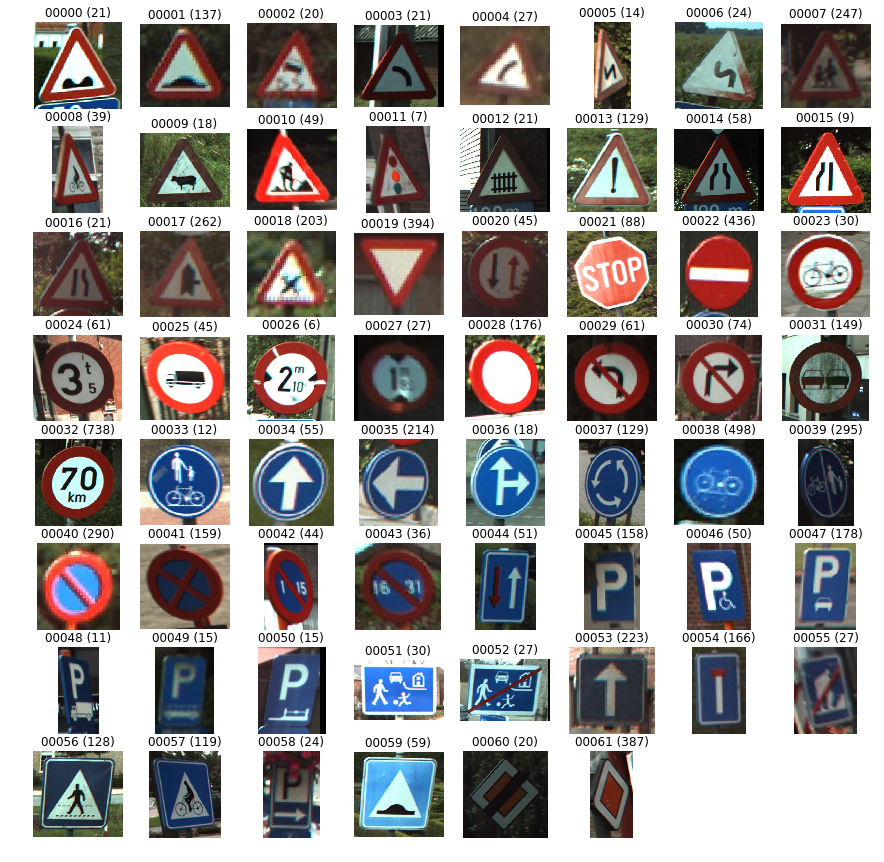

In [7]:
plot_images_and_labels(full_images, full_labels)

## Preview of Resized Images

In [8]:
(resized_images, resized_labels) = split_images_and_labels(resize_images(full_data, size=32))

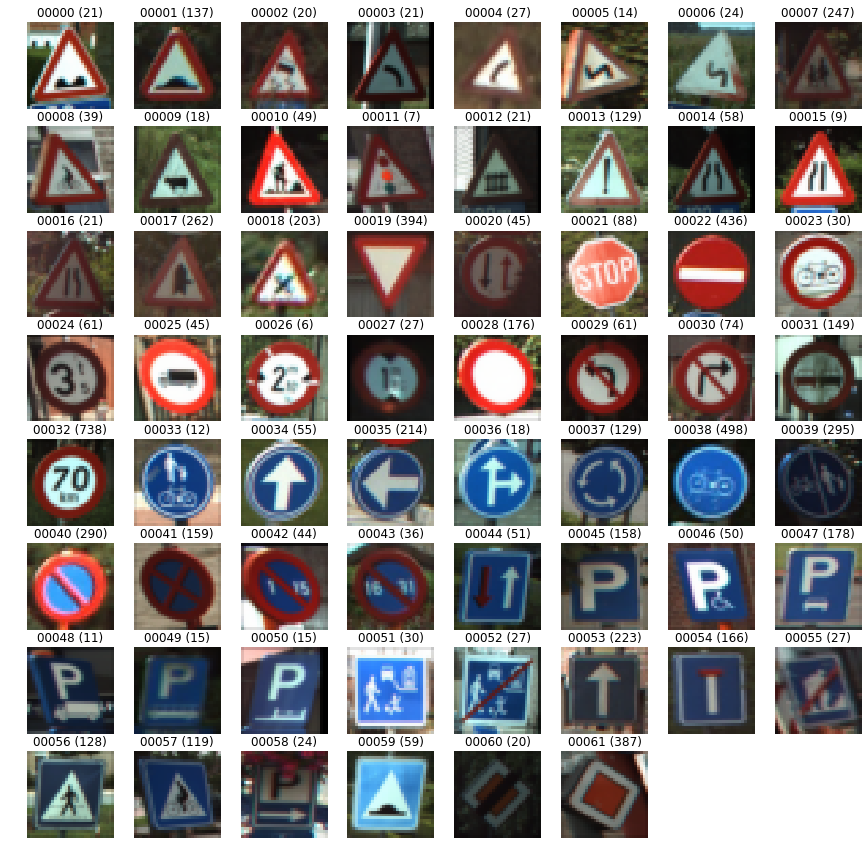

In [9]:
plot_images_and_labels(resized_images, resized_labels)

## Average RGB Values Per Image Class

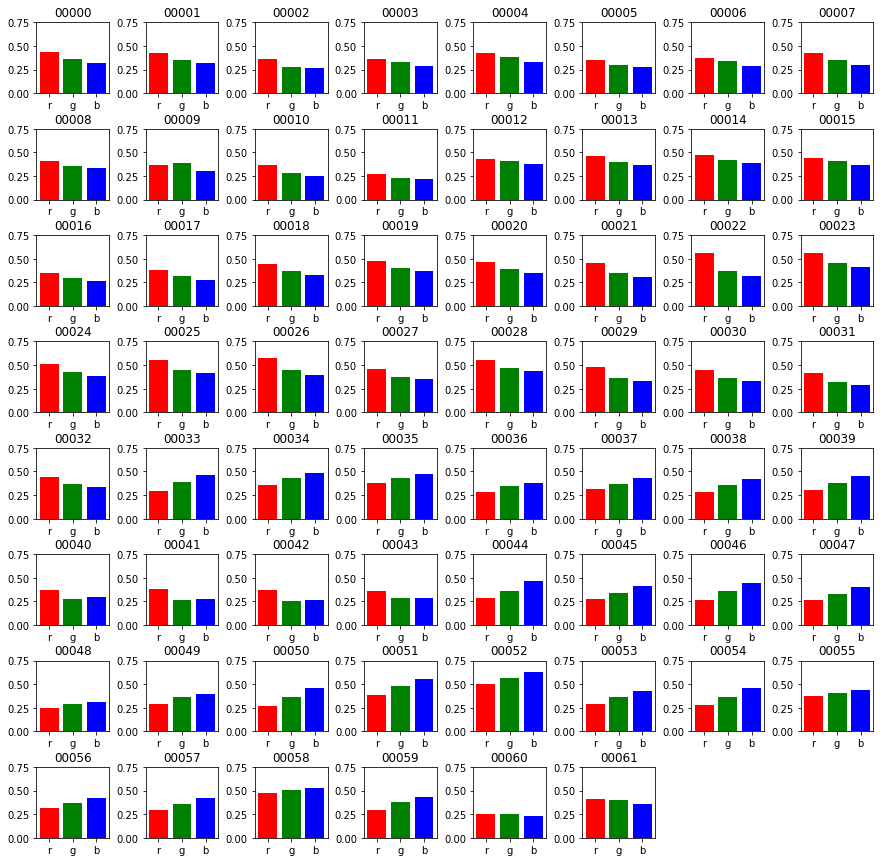

In [10]:
avg_rgb_per_label = compute_average_rgb_per_label(resized_images, resized_labels)
plot_average_rgb_per_label(avg_rgb_per_label)